In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [306]:
data_clean = pd.read_csv("./dataset/news_clean_1.csv")[["Title_processed", "Content_processed", "label"]]
data_pre = pd.read_csv("./dataset/news_pre_1.csv")[["Title", "Content", "label"]]

In [229]:
class visualization:
  def __init__(self, data) -> None:
    self.data = data
    
  def hist_samples(self, data):
    sns.countplot(x = data["label"], data=data)
  
visualize_pre_data = visualization(data_pre)
visualize_clean_data = visualization(data_clean)

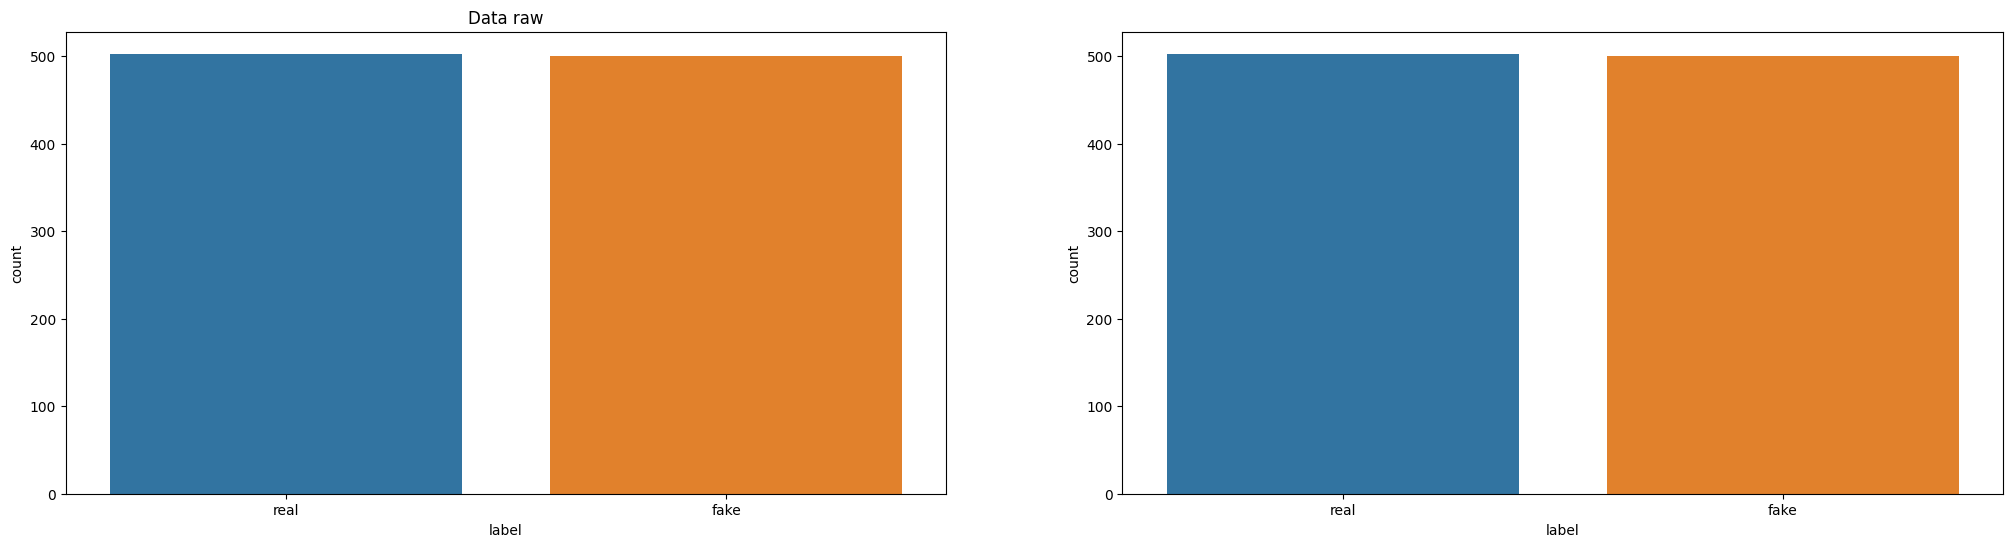

In [230]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
plt.title("Data raw")
visualize_pre_data.hist_samples(data_pre)
plt.subplot(1,2,2)
visualize_clean_data.hist_samples(data_clean)

In [231]:
def get_length_text(text):
  return len(str(text))

In [308]:
data_clean['Length'] = data_clean['Content_processed'].apply(get_length_text)
data_pre["Length"] = data_pre["Content"].apply(get_length_text)

Text(0.5, 1.0, 'Data Clean')

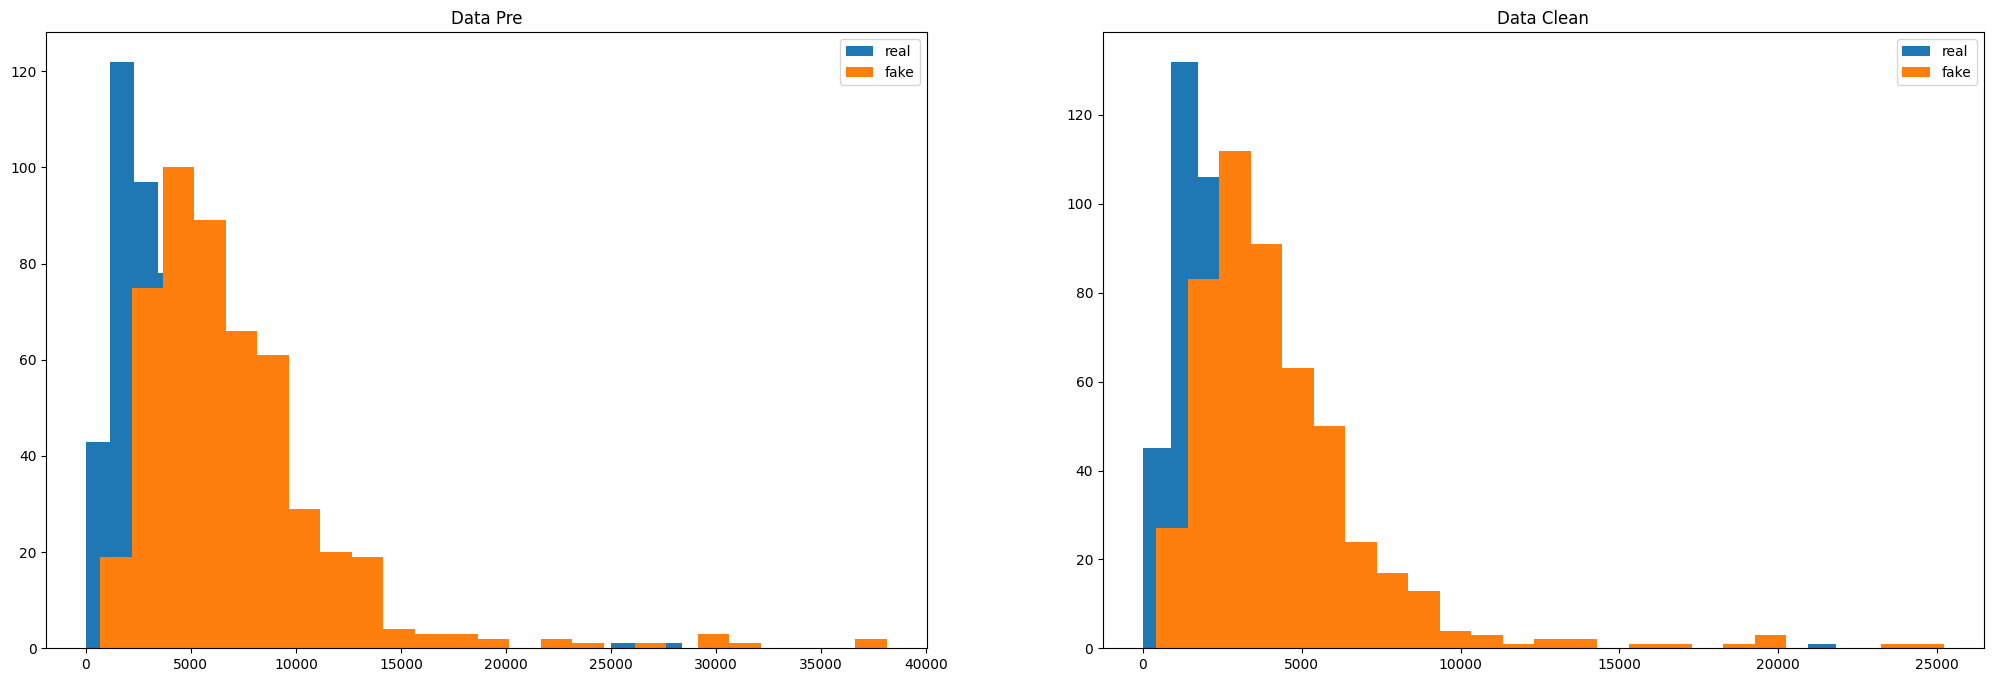

In [233]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.hist(data_pre[data_pre['label']=='real']['Length'], bins=25)
plt.hist(data_pre[data_pre['label']=='fake']['Length'], bins=25)
label = ["real", 'fake']
plt.legend(label)
plt.title("Data Pre")
plt.subplot(1,2,2)
plt.hist(data_clean[data_clean['label']=='real']['Length'], bins=25)
plt.hist(data_clean[data_clean['label']=='fake']['Length'], bins=25)
label = ["real", 'fake']
plt.legend(label)
plt.title("Data Clean")

In [309]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 
removeOutliers(data_clean, "Length")
data_clean = filtered_data

Text(0.5, 1.0, 'Data Clean')

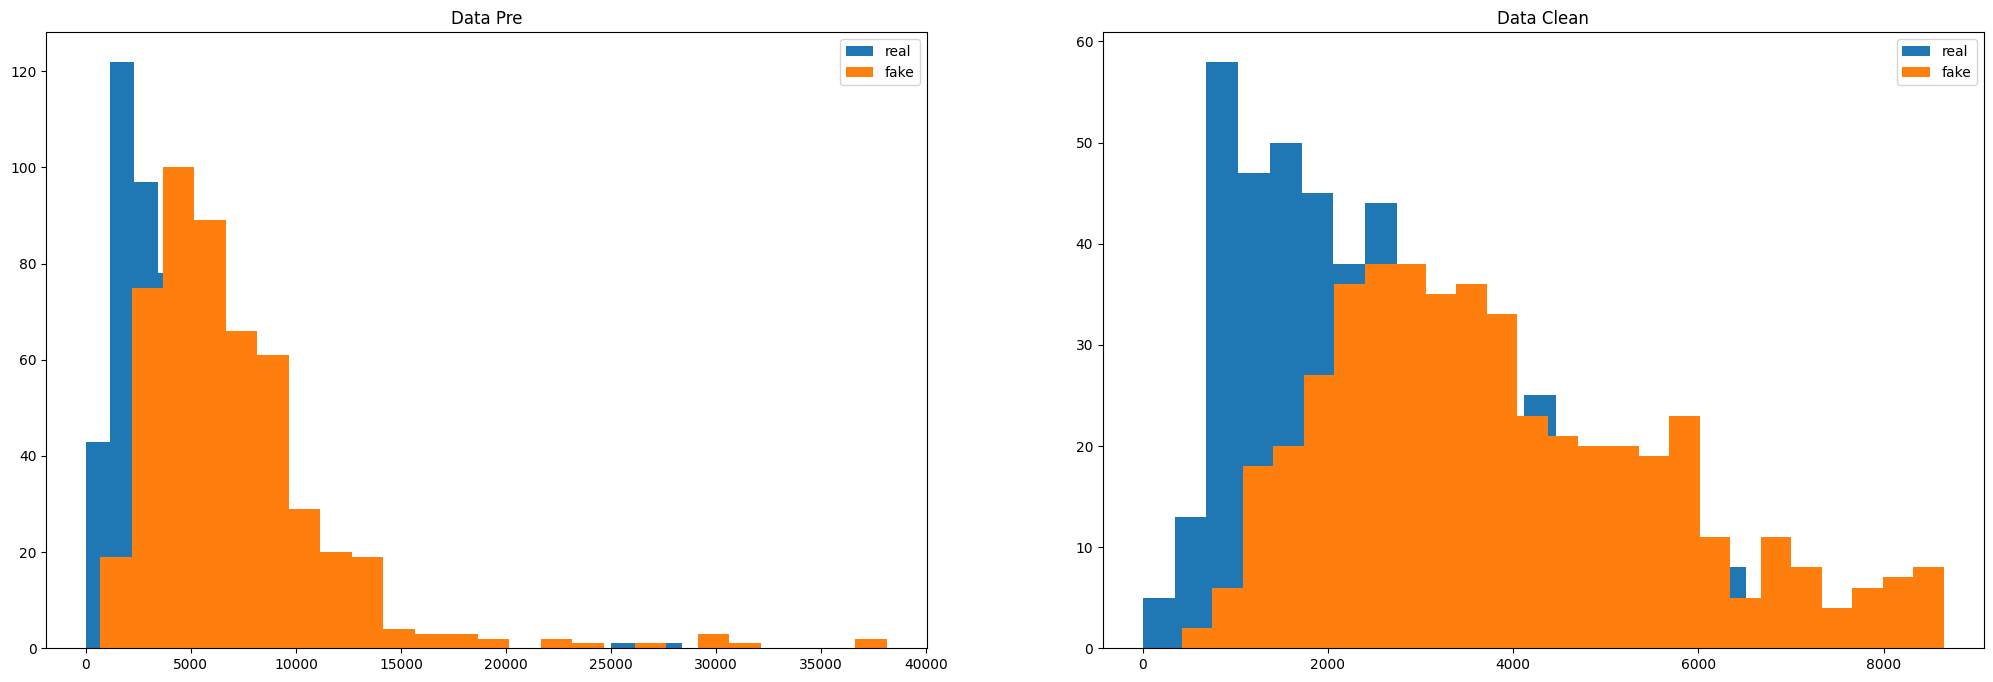

In [235]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.hist(data_pre[data_pre['label']=='real']['Length'], bins=25)
plt.hist(data_pre[data_pre['label']=='fake']['Length'], bins=25)
label = ["real", 'fake']
plt.legend(label)
plt.title("Data Pre")
plt.subplot(1,2,2)
plt.hist(data_clean[data_clean['label']=='real']['Length'], bins=25)
plt.hist(data_clean[data_clean['label']=='fake']['Length'], bins=25)
label = ["real", 'fake']
plt.legend(label)
plt.title("Data Clean")

In [310]:
data_clean = data_clean.dropna()
data_clean.isna().sum()
data_clean.reset_index()
data_clean.label = data_clean.label.map(dict(real = 1, fake = 0))

/var/folders/3p/99_58tl56kzdbsb1dw6qrs3m0000gn/T/ipykernel_7636/3082036626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.label = data_clean.label.map(dict(real = 1, fake = 0))


In [311]:
data_clean

Title_processed  \
0               cử_tri lo_ngại tội_phạm gia_tăng ma_túy   
1                 nhiều đại án giật_mình thất_thoát lớn   
2     cần đổi_mới mạnh_mẽ tư_duy đột_phá thúc_đẩy ph...   
3     thủ_tướng vốn nhà_nước đóng vai_trò dẫn_dắt ph...   
4     tổng_bí_thư nguyễn_phú_trọng trưởng_ban lễ_tan...   
...                                                 ...   
998   nhà hoạt_động dân_chủ úc gốc việt châu_văn_khả...   
999    việt_nam phê_chuẩn hiệp_định tự_do thương_mại eu   
1000                                     quyền viết báo   
1001  tổ_chức phóng_viên biên_giới việt_nam bắt_giữ ...   
1002  tuyên_bố hội nhà_báo độc_lập việt_nam nguyễn_t...   

                                      Content_processed  label  Length  
0     cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_...      1    1733  
1     sáng 31 10 thảo_luận hội_trường chính_sách phá...      1    4182  
2     tham_dự phó_thủ_tướng lê_minh_khái phó_thủ_tướ...      1    8576  
3     chiều 13 11 thủ_tướng phạm_minh_chính chủ_trì ...      1    3769  
4     chiều 23 9 ban_chấp_hành trung_ương đảng_cộng_...      1    5188  
...                                                 ...    ...     ...  
998   tờ the_guardian ấn_bản úc hôm chủ_nhật 7 tháng...      0    3605  
999   quốc_hội việt_nam hôm_nay 08 06 2020 tỷ_lệ biể...      0    1391  
1000  hiến_pháp 25 dân quyền tự_do báo_chí luật báo_...      0    1506  
1001  hai bắt_giữ xảy hai tổ_chức phóng_viên biên_gi...      0    2103  
1002  tuyên_bố hội nhà_báo độc_lập việt_nam nguyễn_t...      0    3140  

[970 rows x 4 columns]

In [312]:
data_clean.isna().sum()

Title_processed      0
Content_processed    0
label                0
Length               0
dtype: int64

In [366]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_clean["Content_processed"], data_clean["label"], test_size= 0.3, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((679,), (679,), (291,), (291,))

In [314]:
tf_idf_vec = TfidfVectorizer(min_df = 3,
                             max_features = 2000, #100_000,
                             analyzer="word",
                             #ngram_range=(1,3), # (1,6)
                             )
tf_idf = tf_idf_vec.fit_transform(X_train)

In [280]:
tf_idf.shape

(679, 2000)

In [287]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=2022)
svd_tfidf = svd.fit_transform(tf_idf)
print("Dimensionality of LSA space: {}".format(svd_tfidf.shape))

Dimensionality of LSA space: (679, 100)


In [249]:
data_clean

Title_processed  \
0               cử_tri lo_ngại tội_phạm gia_tăng ma_túy   
1                 nhiều đại án giật_mình thất_thoát lớn   
2     cần đổi_mới mạnh_mẽ tư_duy đột_phá thúc_đẩy ph...   
3     thủ_tướng vốn nhà_nước đóng vai_trò dẫn_dắt ph...   
4     tổng_bí_thư nguyễn_phú_trọng trưởng_ban lễ_tan...   
...                                                 ...   
998   nhà hoạt_động dân_chủ úc gốc việt châu_văn_khả...   
999    việt_nam phê_chuẩn hiệp_định tự_do thương_mại eu   
1000                                     quyền viết báo   
1001  tổ_chức phóng_viên biên_giới việt_nam bắt_giữ ...   
1002  tuyên_bố hội nhà_báo độc_lập việt_nam nguyễn_t...   

                                      Content_processed  label  Length  
0     cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_...      1    1733  
1     sáng 31 10 thảo_luận hội_trường chính_sách phá...      1    4182  
2     tham_dự phó_thủ_tướng lê_minh_khái phó_thủ_tướ...      1    8576  
3     chiều 13 11 thủ_tướng phạm_minh_chính chủ_trì ...      1    3769  
4     chiều 23 9 ban_chấp_hành trung_ương đảng_cộng_...      1    5188  
...                                                 ...    ...     ...  
998   tờ the_guardian ấn_bản úc hôm chủ_nhật 7 tháng...      0    3605  
999   quốc_hội việt_nam hôm_nay 08 06 2020 tỷ_lệ biể...      0    1391  
1000  hiến_pháp 25 dân quyền tự_do báo_chí luật báo_...      0    1506  
1001  hai bắt_giữ xảy hai tổ_chức phóng_viên biên_gi...      0    2103  
1002  tuyên_bố hội nhà_báo độc_lập việt_nam nguyễn_t...      0    3140  

[970 rows x 4 columns]

/var/folders/3p/99_58tl56kzdbsb1dw6qrs3m0000gn/T/ipykernel_7636/4160483821.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


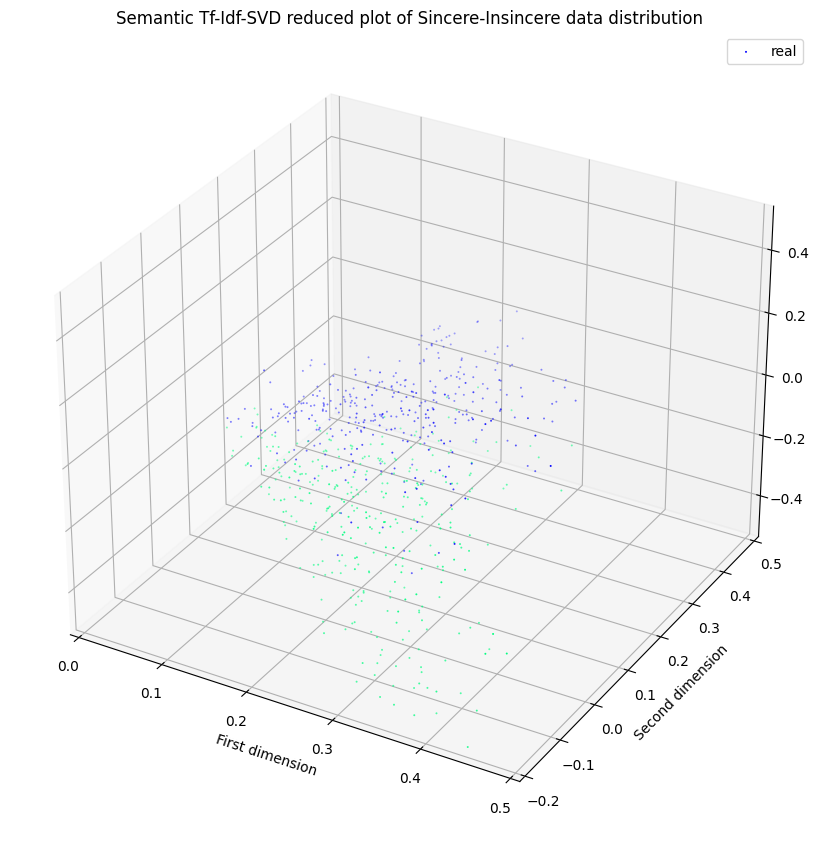

In [288]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))

# Plot models:
ax = Axes3D(fig) 
ax.scatter(svd_tfidf[:,0],
           svd_tfidf[:,1],
           svd_tfidf[:,2],
           c=X_test,
           cmap=plt.cm.winter_r,
           s=2,
           edgecolor='none',
           marker='o')
plt.title("Semantic Tf-Idf-SVD reduced plot of Sincere-Insincere data distribution")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.legend(['real','fake'])
plt.xlim(0.0, 0.5)
plt.ylim(-0.2,0.5)
plt.show()

In [381]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_jobs=4,
                  early_exaggeration=4, # Trying out exaggeration trick
                  n_components=3,
                  perplexity=100,
                  verbose=1,
                  random_state=2022,
                  n_iter=5000)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.003s...
[t-SNE] Computed neighbors for 679 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 0.353151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 13.086160
[t-SNE] KL divergence after 900 iterations: 0.767946


In [382]:
tsne_tfidf_df = pd.DataFrame(data=tsne_tfidf, columns=["x", "y", "z"])
tsne_tfidf_df["Content_processed"] = X_train.reset_index()["Content_processed"]
tsne_tfidf_df["label"] = Y_train.reset_index()["label"]

In [383]:
tsne_tfidf_df

x          y          z  \
0    17.412157 -45.084698  69.291191   
1    21.340000 -33.435253   5.784554   
2    22.549465  48.565384 -17.580858   
3    68.963219 -42.319107  15.311874   
4    33.252533  25.239697  26.056528   
..         ...        ...        ...   
674   3.645654  41.565094  55.512257   
675   3.416116  67.232208  -8.196275   
676 -54.872143  34.780510  -4.601589   
677   9.568892  87.483757  31.538002   
678 -17.069828 -53.390217  58.896240   

                                     Content_processed  label  
0    sáng quốc_hội ủy_ban thường_vụ_quốc_hội báo_cá...      1  
1    nổ bệnh bất_trị đầu nhân_vật giai_cấp cầm_quyề...      0  
2    hầu_hết quốc_gia thế_giới giáo_dục coi nền_tản...      0  
3    thắng_lợi vĩ_đại cách_mạng_tháng_tám 1945 thắn...      1  
4    điều âu_lo chế_độ toàn trị việt_nam đựợc quyền...      0  
..                                                 ...    ...  
674  theo thông_cáo ủy_ban kiểm_tra ubkt t 18 19 10...      1  
675  trong tỉnh tiền_giang chú_trọng công_tác phát_...      1  
676  khuyến_nghị lhq 116 117 331 bộ_luật_hình_sự vụ...      0  
677  ngày 10 6 quảng_nam ban_chỉ_đạo xây_dựng đề_án...      1  
678  làm giờđầu tiên nghị_quyết 30 kỳ họp quốc_hội ...      1  

[679 rows x 5 columns]

In [384]:
data_clean["Content_processed"]

0       cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_...
1       sáng 31 10 thảo_luận hội_trường chính_sách phá...
2       tham_dự phó_thủ_tướng lê_minh_khái phó_thủ_tướ...
3       chiều 13 11 thủ_tướng phạm_minh_chính chủ_trì ...
4       chiều 23 9 ban_chấp_hành trung_ương đảng_cộng_...
                              ...                        
998     tờ the_guardian ấn_bản úc hôm chủ_nhật 7 tháng...
999     quốc_hội việt_nam hôm_nay 08 06 2020 tỷ_lệ biể...
1000    hiến_pháp 25 dân quyền tự_do báo_chí luật báo_...
1001    hai bắt_giữ xảy hai tổ_chức phóng_viên biên_gi...
1002    tuyên_bố hội nhà_báo độc_lập việt_nam nguyễn_t...
Name: Content_processed, Length: 970, dtype: object

In [388]:
tsne_tfidf_df

x          y          z  \
0    17.412157 -45.084698  69.291191   
1    21.340000 -33.435253   5.784554   
2    22.549465  48.565384 -17.580858   
3    68.963219 -42.319107  15.311874   
4    33.252533  25.239697  26.056528   
..         ...        ...        ...   
674   3.645654  41.565094  55.512257   
675   3.416116  67.232208  -8.196275   
676 -54.872143  34.780510  -4.601589   
677   9.568892  87.483757  31.538002   
678 -17.069828 -53.390217  58.896240   

                                     Content_processed  label  
0    sáng quốc_hội ủy_ban thường_vụ_quốc_hội báo_cá...      1  
1    nổ bệnh bất_trị đầu nhân_vật giai_cấp cầm_quyề...      0  
2    hầu_hết quốc_gia thế_giới giáo_dục coi nền_tản...      0  
3    thắng_lợi vĩ_đại cách_mạng_tháng_tám 1945 thắn...      1  
4    điều âu_lo chế_độ toàn trị việt_nam đựợc quyền...      0  
..                                                 ...    ...  
674  theo thông_cáo ủy_ban kiểm_tra ubkt t 18 19 10...      1  
675  trong tỉnh tiền_giang chú_trọng công_tác phát_...      1  
676  khuyến_nghị lhq 116 117 331 bộ_luật_hình_sự vụ...      0  
677  ngày 10 6 quảng_nam ban_chỉ_đạo xây_dựng đề_án...      1  
678  làm giờđầu tiên nghị_quyết 30 kỳ họp quốc_hội ...      1  

[679 rows x 5 columns]

In [391]:
tsne_tfidf_df.isna().sum()

x                    0
y                    0
z                    0
Content_processed    0
label                0
dtype: int64

In [437]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
quora_texts = list(X_train)

# Creating a list of terms and a list of labels to go with it
documents = [TaggedDocument(doc.split(), tags=[str(i)]) for i, doc in enumerate(quora_texts)]

In [438]:
documents[0]

TaggedDocument(words=['sáng', 'quốc_hội', 'ủy_ban', 'thường_vụ_quốc_hội', 'báo_cáo', 'kết_quả', 'thảo_luận', 'đoàn', 'giải_trình', 'tiếp_thu', 'ý_kiến', 'đbqh', 'dự_kiến', 'nhân_sự', 'bầu', 'chủ_tịch', 'ủy_viên', 'chính_trị', 'chủ_tịch', 'nguyễn_xuân_phúc', 'đề_cử', 'quốc_hội', 'bầu', 'chủ_tịch', 'nhiệm_kỳ', '2021', '2026', 'quốc_hội', 'bầu', 'chủ_tịch', 'hình_thức', 'bỏ_phiếu', 'kín', 'quốc_hội', 'thảo_luận', 'biểu_quyết', 'thông_qua', 'nghị_quyết', 'bầu', 'chủ_tịch', 'chủ_tịch', 'tuyên_thệ', 'quốc_hội', 'đồng_bào', 'cử_tri', 'bầu', 'chủ_tịch', 'trình', 'danh_sách', 'đề_cử', 'quốc_hội', 'bầu', 'thủ_tướng', 'chính_phủ', 'phó', 'chủ_tịch', 'chánh_án', 'toà_án_nhân_dân_tối_cao', 'viện_trưởng', 'viện_kiểm_sát_nhân_dân_tối_cao', 'kết_thúc', 'phiên', 'làm_việc', 'quốc_hội', 'thảo_luận', 'đoàn', 'dự_kiến', 'nhân_sự', 'bầu', 'chức_danh', 'đầu', 'chiều', 'ủy_ban', 'thường_vụ_quốc_hội', 'báo_cáo', 'quốc_hội', 'kết_quả', 'thảo_luận', 'đoàn', 'dự_kiến', 'nhân_sự', 'bầu', 'thủ_tướng', 'chính_phủ',

In [399]:
mean_ = np.mean(data_clean.Length)
mean_

3273.3082474226803

In [439]:
max_epochs = 100
alpha=0.025
model = Doc2Vec(documents,
                vector_size= 3273, 
                min_alpha=0.00025,
                alpha=alpha,
                min_count=1,
#                 window=2, 
                workers=5)

In [440]:
model.build_vocab(documents)

In [441]:
model.train(documents, total_examples= model.corpus_count, epochs=10)

In [433]:
model.save("./doc2vec.bin")

In [434]:
model = Doc2Vec.load("./doc2vec.bin")

In [448]:
tsne_model = TSNE(n_jobs=4,
                  early_exaggeration=4,
                  n_components=2,
                  verbose=1,
                  random_state=2022,
                  n_iter=300)
tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors)

# Putting the tsne information into sq
tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=["x", "y"])
# tsne_tfidf_df.columns = ["x", "y"]
tsne_d2v_df["content"] = X_train.reset_index()["Content_processed"]
tsne_d2v_df["label"] = Y_train.reset_index()["label"]

/var/folders/3p/99_58tl56kzdbsb1dw6qrs3m0000gn/T/ipykernel_7636/3442324564.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 679 samples in 0.002s...
[t-SNE] Computed neighbors for 679 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 2.016174
[t-SNE] KL divergence after 250 iterations with early exaggeration: 14.453951
[t-SNE] KL divergence after 300 iterations: 0.976674


In [450]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

output_notebook()
plot_d2v = bp.figure(outer_width = 800, outer_height = 700, 
                       title = "T-SNE applied to Doc2vec document embeddings",
                       tools = "pan, wheel_zoom, box_zoom, reset, hover",
                       x_axis_type = None, y_axis_type = None, min_border = 1)

# colormap = np.array(["#6d8dca", "#d07d3c"])
colormap = np.array(["darkblue", "cyan"])

# palette = d3["Category10"][len(tsne_tfidf_df["asset_name"].unique())]
source = ColumnDataSource(data = dict(x = tsne_d2v_df["x"], 
                                      y = tsne_d2v_df["y"],
                                      color = colormap[tsne_d2v_df["label"]],
                                      content = tsne_d2v_df["content"],
                                      label = tsne_d2v_df["label"]))
                          
plot_d2v.scatter(x = "x", 
                   y = "y", 
                   color="color",
                   #legend = "target",
                   source = source,
                   alpha = 0.7)
hover = plot_d2v.select(dict(type = HoverTool))
hover.tooltips = {
                  "content": "@content", 
                  "label":"@label"}

show(plot_d2v)

Loading BokehJS ...